In [ ]:
#!pip install yfinance

### Análise de preços de ações

Using yfinance to collect data from Yahoo Finance and visualizing in some plots the Open Price, Volume of stocks traded and Market Capitalization. I'll made a predict of change of price using Clustering model.'

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import yfinance as yf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
start = "2008-01-01"
end = "2021-12-23"
MSFT = yf.download('MSFT', start, end)
TSLA = yf.download('TSLA', start, end)
AAPL = yf.download('AAPL', start, end)
NVDA = yf.download('NVDA', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


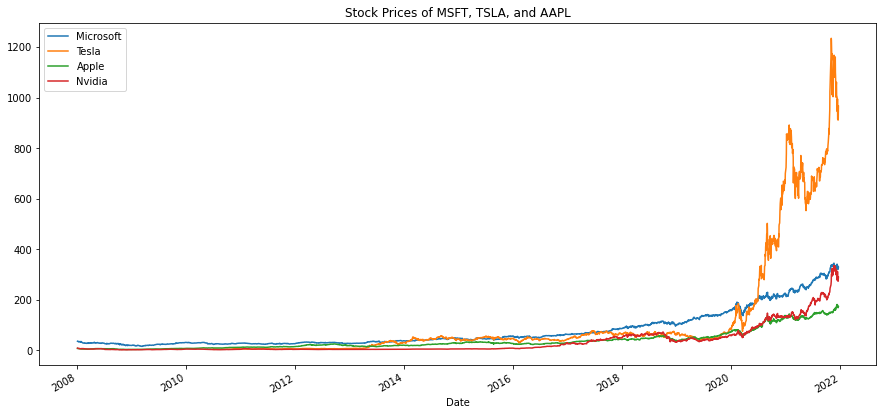

In [3]:
MSFT['Open'].plot(label = "Microsoft", figsize =(15,7))
TSLA['Open'].plot(label = "Tesla")
AAPL['Open'].plot(label = "Apple")
NVDA['Open'].plot(label = "Nvidia")
plt.title('Stock Prices of MSFT, TSLA, and AAPL')
plt.legend()

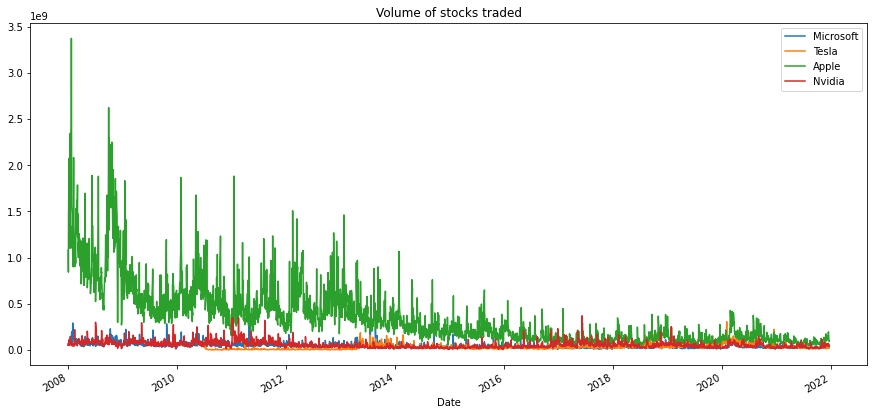

In [4]:
plt.figure(figsize = (15,7))
MSFT['Volume'].plot(label = "Microsoft")
TSLA['Volume'].plot(label = "Tesla")
AAPL['Volume'].plot(label = "Apple")
NVDA['Volume'].plot(label = "Nvidia")
plt.title('Volume of stocks traded')
plt.legend()

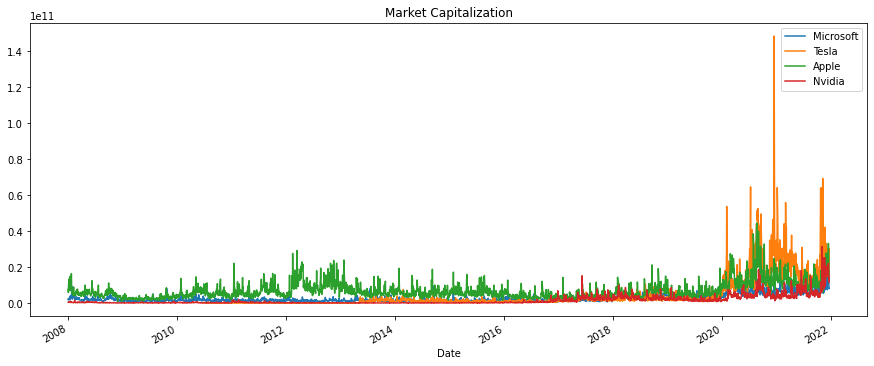

In [5]:
# Market Capitalization
plt.figure(figsize = (15,6))
MSFT['MarktCap'] = MSFT['Open'] * MSFT['Volume']
TSLA['MarktCap'] = TSLA['Open'] * TSLA['Volume']
AAPL['MarktCap'] = AAPL['Open'] * AAPL['Volume']
NVDA['MarktCap'] = NVDA['Open'] * NVDA['Volume']
MSFT['MarktCap'].plot(label = "Microsoft")
TSLA['MarktCap'].plot(label = "Tesla")
AAPL['MarktCap'].plot(label = "Apple")
NVDA['MarktCap'].plot(label = "Nvidia")
plt.title("Market Capitalization")
plt.legend()

In [6]:
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume,MarktCap
Date,,,,,,,
2008-01-02,35.790001,35.959999,35.000000,35.220001,26.098082,63004200,2.254920e+09
2008-01-03,35.220001,35.650002,34.860001,35.369999,26.209234,49599600,1.746898e+09
2008-01-04,35.189999,35.200001,34.090000,34.380001,25.475653,72090800,2.536875e+09
2008-01-07,34.549999,34.799999,34.250000,34.610001,25.646078,80164300,2.769677e+09
2008-01-08,34.709999,34.709999,33.400002,33.450001,24.786518,79148300,2.747237e+09


In [7]:
# Verificando a correlação das variáveis, onde -1 mostra uma correlação negativa, +1 uma correlação positiva e 0 que não 
# há relacionamento entre as variáveis
MSFT.corr()

,Open,High,Low,Close,Adj Close,Volume,MarktCap
Open,1.000000,0.999919,0.999910,0.999831,0.999794,-0.368108,0.794410
High,0.999919,1.000000,0.999867,0.999905,0.999868,-0.365603,0.797674
Low,0.999910,0.999867,1.000000,0.999916,0.999876,-0.371152,0.790276
Close,0.999831,0.999905,0.999916,1.000000,0.999957,-0.368764,0.793339
Adj Close,0.999794,0.999868,0.999876,0.999957,1.000000,-0.370480,0.792682
Volume,-0.368108,-0.365603,-0.371152,-0.368764,-0.370480,1.000000,0.102582
MarktCap,0.794410,0.797674,0.790276,0.793339,0.792682,0.102582,1.000000


In [8]:
MSFT.skew()

Open         1.729549
High         1.727003
Low          1.732742
Close        1.730427
Adj Close    1.725640
Volume       2.571277
MarktCap     2.318676
dtype: float64

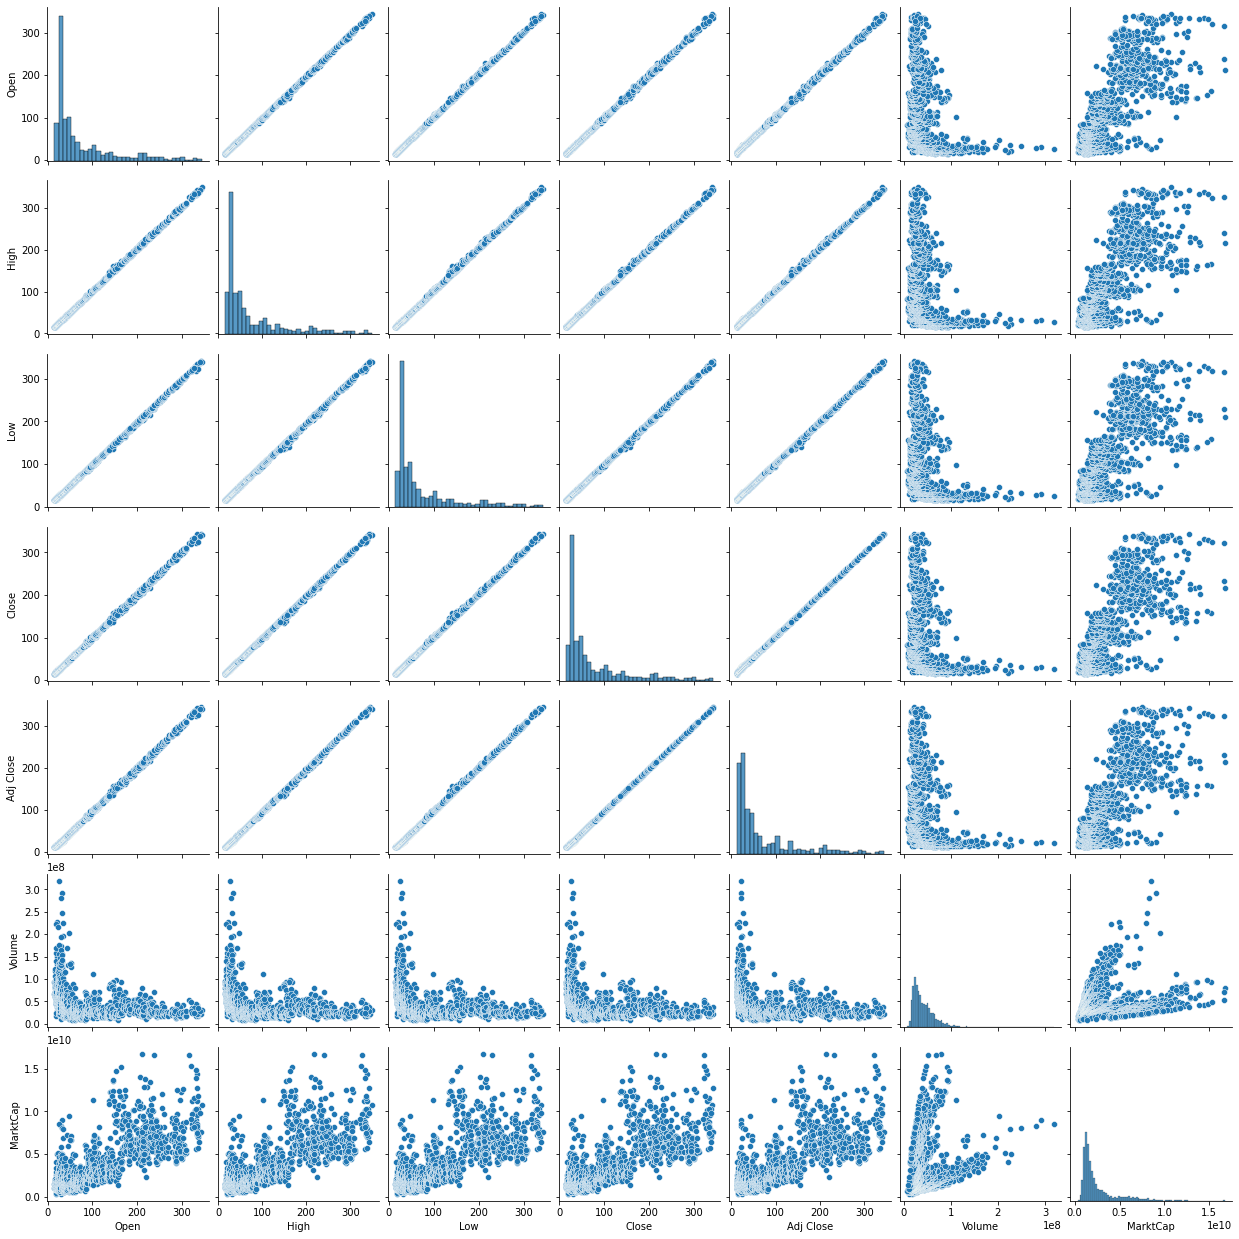

In [9]:
sns.pairplot(MSFT)

<AxesSubplot:>

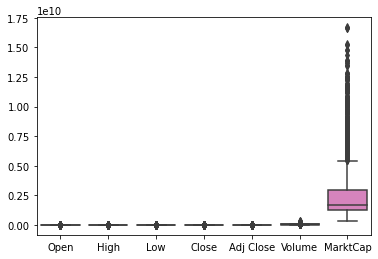

In [10]:
sns.boxplot(data = MSFT, orient = "v")

<AxesSubplot:xlabel='MarktCap', ylabel='Density'>

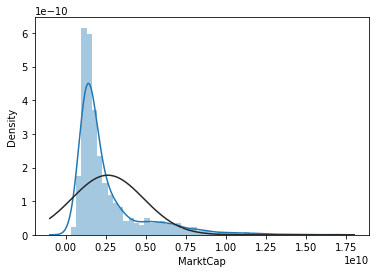

In [11]:
from scipy import stats
sns.distplot(MSFT.MarktCap, fit = stats.norm)

<AxesSubplot:xlabel='Date'>

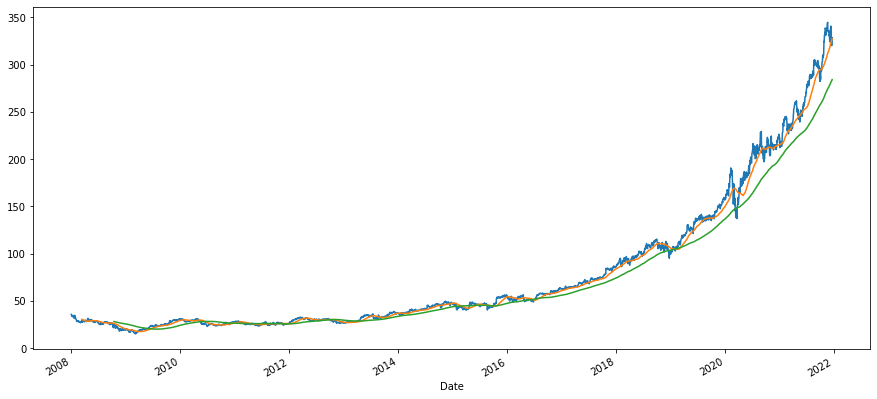

In [12]:
MSFT['MA50'] = MSFT['Open'].rolling(50).mean()
MSFT['MA200'] = MSFT['Open'].rolling(200).mean()
MSFT['Open'].plot(figsize = (15,7))
MSFT['MA50'].plot()
MSFT['MA200'].plot()